In [1]:
import numpy as np
import matplotlib.pyplot as plt

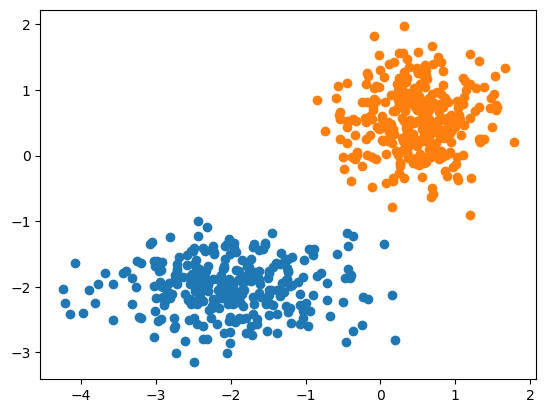

In [64]:
# generate dataset with two classes (labeled as 10 and 01, i.e. one-hot encoding)
n_pt = 300

cls1 = np.column_stack((np.random.normal(loc = [-2, -2], scale=[.8, .4], size=(n_pt, 2)), np.ones(n_pt), np.zeros(n_pt)))
cls2 = np.column_stack((np.random.normal(loc = [0.5, 0.5], scale=[.5, .5], size=(n_pt, 2)), np.zeros(n_pt), np.ones(n_pt)))

data_set = np.concatenate((cls1, cls2))
np.random.shuffle(data_set)

features = data_set[:, :2]
# labels are used for illustration only
labels = data_set[:, 2:]

plt.scatter(features[labels[:, 1] == 0][:, 0], features[labels[:, 1] == 0][:, 1])
plt.scatter(features[labels[:, 1] == 1][:, 0], features[labels[:, 1] == 1][:, 1])

In [65]:
# 2D gaussian function 
def gaussian_2D (mu, sigma, xs):
    return np.exp(-0.5 * np.diag((xs - mu) @ (np.linalg.inv(sigma)) @ (xs - mu).T)) \
               / (np.sqrt(np.linalg.det(sigma) * ((2 * np.pi)**2)))

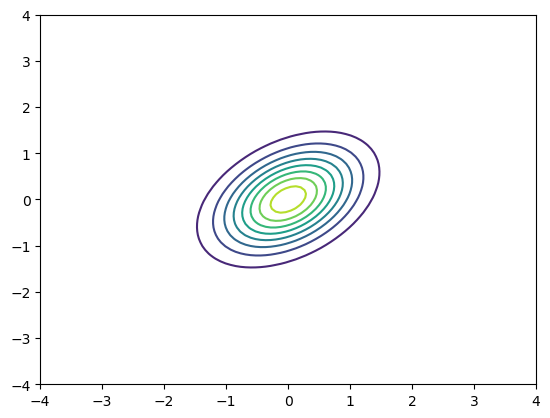

In [75]:
_mu = np.array([0, 0])
_sigma = np.array([[0.5, 0.2], [0.2, 0.5]])

def draw(mu, sigma, rng):
    arr = []
    for y in np.linspace(rng[0], rng[1], 100):
        for x in np.linspace(rng[0], rng[1], 100):
            arr.append([x, y])
    arr = np.array(arr)
    gaus = gaussian_2D(mu, sigma, arr)

    plt.contour(np.linspace(rng[0], rng[1], 100), np.linspace(rng[0], rng[1], 100), np.reshape(gaus, (100, 100)), levels=8)

draw(_mu, _sigma, (-4, 4))

In [79]:
def expection(pi_k, mu_k, sigma_k, xs):
    const = np.zeros(xs.shape[0])
    for (pi, mu, sigma) in zip(pi_k, mu_k, sigma_k):
        const += pi * gaussian_2D(mu, sigma, xs)
        
    gamma_z_nk = []
    for (pi, mu, sigma) in zip(pi_k, mu_k, sigma_k):
        gamma_z_nk.append(pi * gaussian_2D(mu, sigma, xs) / const)
    return np.column_stack(gamma_z_nk)

def maximization(gamma_z_nk, xs):
    nk = np.sum(gamma_z_nk, axis=0)
    mu_k = [(1 / n) * np.sum(np.expand_dims(gamma_z_nk[:, i], axis=1) * features, axis=0) for i, n in enumerate(nk)]
    sigma_k = [(1 / n) * ((xs-mu_k[i]).T @ np.diag(gamma_z_nk[:, i]) @ (xs-mu_k[i])) for i, n in enumerate(nk)]
    pi_k = [n / xs.shape[0] for n in nk]

    return pi_k, mu_k, sigma_k

In [80]:
n_iter = 500

pi_k = [0.5, 0.5]
mu_k = [np.array([-1, -1]), np.array([1, 1])]
sigma_k = [np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]])]

for i in range(n_iter):
    gamma = expection(pi_k, mu_k, sigma_k, features)
    pi_new, mu_new, sigma_new = maximization(gamma, features)
    if np.allclose(pi_new, pi_k) and np.allclose(mu_new, mu_k) and np.allclose(sigma_new, sigma_k):
        break
    pi_k = pi_new
    mu_k = mu_new
    sigma_k = sigma_new

i, pi_k, mu_k, sigma_k

(9,
 [0.4996967641734269, 0.5003032358265731],
 [array([-2.05057325, -2.00541842]), array([0.47088789, 0.540407  ])],
 [array([[0.635571  , 0.0026739 ],
         [0.0026739 , 0.15495964]]),
  array([[0.23918915, 0.0103888 ],
         [0.0103888 , 0.249277  ]])])

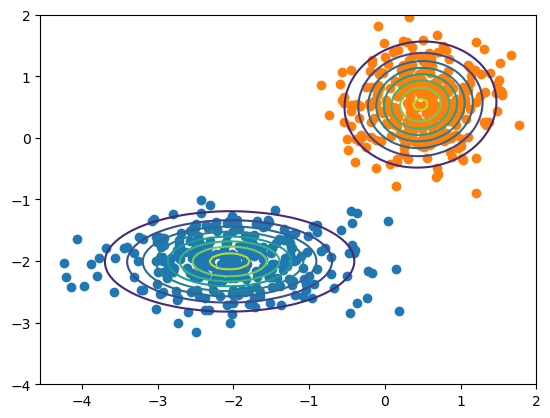

In [81]:
plt.scatter(features[labels[:, 1] == 0][:, 0], features[labels[:, 1] == 0][:, 1])
plt.scatter(features[labels[:, 1] == 1][:, 0], features[labels[:, 1] == 1][:, 1])

for (mu, sigma) in zip(mu_k, sigma_k):
    draw(mu, sigma, (-4, 2))